In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
data = pd.read_csv('data/여성가족부/전자담배구입방법.csv',index_col=0).dropna().reset_index(drop=True)
data

,특성별(2),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,...,2020.26,2020.27,2020.28,2020.29,2020.30,2020.31,2020.32,2020.33,2020.34,2020.35
0,특성별(2),편의점 가게 슈퍼마켓,편의점 가게 슈퍼마켓,편의점 가게 슈퍼마켓,편의점 가게 슈퍼마켓,편의점 가게 슈퍼마켓,편의점 가게 슈퍼마켓,전자담배 판매(충전)점,전자담배 판매(충전)점,전자담배 판매(충전)점,...,PC방 노래방,PC방 노래방,PC방 노래방,PC방 노래방,인터넷/모바일을 통한 직접 주문,인터넷/모바일을 통한 직접 주문,인터넷/모바일을 통한 직접 주문,인터넷/모바일을 통한 직접 주문,인터넷/모바일을 통한 직접 주문,인터넷/모바일을 통한 직접 주문
1,특성별(2),전체(사례수) (명),구입 여부 (%),구입 여부 (%),나이 및 본인 여부 확인 (%),나이 및 본인 여부 확인 (%),나이 및 본인 여부 확인 (%),전체(사례수) (명),구입 여부 (%),구입 여부 (%),...,나이 확인 방법 (%),나이 확인 방법 (%),본인 확인 방법 (%),본인 확인 방법 (%),전체(사례수) (명),구입 여부 (%),구입 여부 (%),나이 및 본인 여부 확인 (%),나이 및 본인 여부 확인 (%),나이 및 본인 여부 확인 (%)
2,특성별(2),소계,구입한 적 없음,구입한 적 있음,확인했음,확인하는 곳도 있고 확인하지 않는 곳도 있었음,확인하지 않았음,소계,구입한 적 없음,구입한 적 있음,...,구두 확인,신분증 요구,신분증 얼굴 대조,위조/변조 식별기계 확인,소계,구입한 적 없음,구입한 적 있음,확인했음,확인하는 곳도 있고 확인하지 않는 곳도 있었음,확인하지 않았음
3,소계,56,63.6,36.4,40.4,33.2,26.4,57,16.6,83.4,...,65.3,34.7,100.0,0.0,31,42.1,57.9,31.6,11.5,56.9
4,중1,1,100.0,0.0,0.0,0.0,0.0,1,100.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
5,중2,2,69.8,30.2,0.0,0.0,100.0,2,30.2,69.8,...,0.0,0.0,0.0,0.0,3,67.3,32.7,0.0,0.0,100.0
6,중3,10,64.5,35.5,35.0,39.8,25.2,10,26.6,73.4,...,100.0,0.0,0.0,0.0,6,20.0,80.0,15.2,0.0,84.8
7,고1,6,67.0,33.0,0.0,100.0,0.0,6,12.3,87.7,...,0.0,0.0,0.0,0.0,7,24.2,75.8,52.7,0.0,47.3
8,고2,21,51.8,48.2,42.7,30.2,27.1,21,0.1,99.9,...,0.0,0.0,0.0,0.0,7,54.2,45.8,32.6,16.8,50.6
9,고3,17,74.1,25.9,63.0,7.3,29.6,18,26.3,73.7,...,0.0,100.0,100.0,0.0,9,53.3,46.7,32.4,38.3,29.3


In [10]:
data.iloc[:,3][2]
print(len(data.columns))

94


In [15]:
# 연도별 구매루트 비율(중복가능)
df = []
for i in range(len(data.columns)):
    if data.iloc[:,i][2] == "구입한 적 있음":
        df.append(data.iloc[:,i][0:4:3])
df = pd.DataFrame(df)
df

,0,3
2016.2,편의점 가게 슈퍼마켓,36.4
2016.8,전자담배 판매(충전)점,83.4
2016.14,PC방 노래방,22.7
2016.20,인터넷/모바일을 통한 직접 주문,35.0
2018.2,편의점 가게 슈퍼마켓,46.7
2018.12,전자담배 판매(충전)점,58.2
2018.22,PC방 노래방,18.1
2018.32,인터넷/모바일을 통한 직접 주문,46.8
2020.2,편의점 가게 슈퍼마켓,46.7
2020.12,전자담배 판매(충전)점,37.5


In [74]:
market = df.iloc[:,1][0::4].astype(float)
store = df.iloc[:,1][1::4].astype(float)
pc = df.iloc[:,1][2::4].astype(float)
internet = df.iloc[:,1][3::4].astype(float)
internet

2016.20    35.0
2018.32    46.8
2020.32    57.9
Name: 3, dtype: float64

In [65]:
import numpy as np

arr = np.arange(2016,2021,2)
arr

array([2016, 2018, 2020])

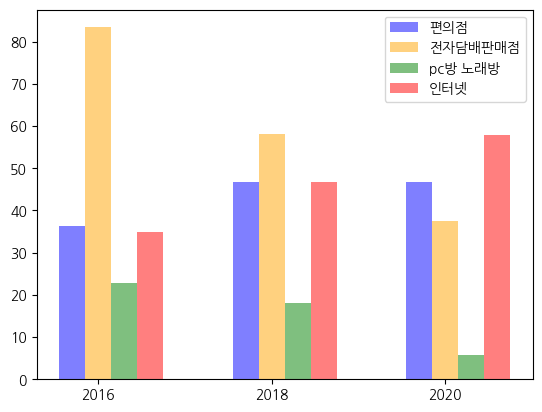

In [111]:
w = 0.3
plt.bar(arr-w,market,width=0.3, alpha=0.5, color='blue', label='편의점')
plt.bar(arr,store,width=0.3, alpha=0.5, color='orange', label='전자담배판매점')
plt.bar(arr+w,pc,width=0.3, alpha=0.5, color='green',label='pc방 노래방')
plt.bar(arr+w+w,internet,width=0.3, alpha=0.5, color='red', label='인터넷')
plt.xticks(range(2016,2021,2))
# plt.Subplots(figsize=[12,6])
plt.legend()